In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
trump = pd.read_json('data/trump.json')

In [3]:
trump.shape

(38397, 21)

## Data formatting

In [4]:
# dates covered by the dataset
print(trump.timestamp.min())
print(trump.timestamp.max())

2009-05-04 18:54:25
2019-11-11 23:58:14


In [5]:
trump['text_lower'] = trump.text.str.lower()

In [6]:
#Turn into a function to catch all cases
# Create a column based on fake_news talk
trump['fake_news'] = pd.Series(trump.text_lower.str.contains(pat = "fake news")\
    | pd.Series(trump.text_lower).str.contains(pat = "#fakenews")\
    | pd.Series(trump.text_lower).str.contains(pat = "fake media")
    | pd.Series(trump.text_lower).str.contains(pat = "#fakemedia"))


In [7]:
trump.fake_news.value_counts()

False    37852
True       545
Name: fake_news, dtype: int64

## Data Analysis

In [8]:
# Aggregate tweets by days

d = {'timestamp':'days'}

trump_days = trump.groupby(trump.timestamp.dt.date)./
    agg({'timestamp':'count', 'fake_news':'sum'}).rename(columns=d)

trump_days['fake_news'] = trump_days['fake_news'].astype('int32')

In [9]:
# Add True/False column based on fake_news

trump_days['label'] = np.where(trump_days['fake_news']>=1, 'yes', 'no')

fake_news = trump_days[trump_days['label'] == 'yes']

In [10]:
print(trump_days.label.value_counts())
print(trump_days.fake_news.sum())


no     2703
yes     371
Name: label, dtype: int64
545


In [11]:
print('First Trump tweet mentioning fake news: {}'.format(fake_news.index.min()))
print('Last Trump tweet mentioning fake news: {}'.format(fake_news.index.max()))
print('Total tweets from Trump mentioning fake news: {}'.format(fake_news.fake_news.sum()))

First Trump tweet mentioning fake news: 2016-12-10
Last Trump tweet mentioning fake news: 2019-11-11
Total tweets from Trump mentioning fake news: 545


In [12]:
# Frequency Trump mentiones 'fake news' in his tweets
res = (pd.Series(fake_news.index[1:]) - pd.Series(fake_news.index[:-1])).value_counts()
res.mean()

21.764705882352942

{'whiskers': [<matplotlib.lines.Line2D at 0x11c05fc18>,
 'caps': [<matplotlib.lines.Line2D at 0x11c05ff98>,
 'boxes': [<matplotlib.lines.Line2D at 0x11c05f710>],
 'medians': [<matplotlib.lines.Line2D at 0x11c0a0a58>],
 'fliers': [<matplotlib.lines.Line2D at 0x11c0a0da0>],
 'means': []}

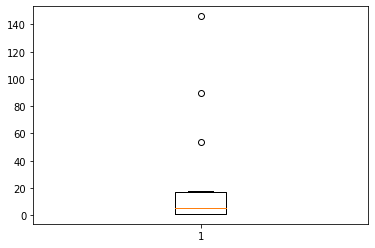

In [13]:
plt.boxplot(res)

/Users/cmserna/Sites/virtualenvs/twitter-scraper/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


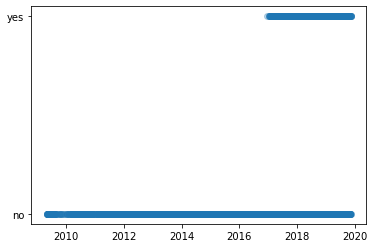

In [14]:
plt.plot(trump_days.index, trump_days.label, 'o', alpha = 0.3);

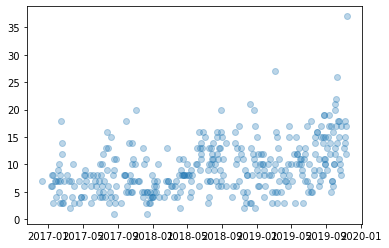

In [15]:
plt.plot(fake_news.index, fake_news.days, 'o', alpha = 0.3);	